In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [108]:
train_df.head(10)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   
5            1      State_1     Commercial   
6            1      State_1     Commercial   
7            1      State_1     Commercial   
8            1      State_1     Commercial   
9            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   
5                      Warehouse_Selfstorage    119900.0      1956.0   
6                  Warehouse_Nonrefrigerated     91367.0      1982.0   
7                  Warehouse_Nonrefrigerated     50422.0      1947.0   
8                       Office_Uncategorized    122020.0      1929.0   
9                       Office_Uncategorized    102612.0      1979.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   
5                 NaN        2.4                36              50.5  ...   
6                56.0        2.4                36              50.5  ...   
7                99.0        2.4                36              50.5  ...   
8                98.0        2.4                36              50.5  ...   
9                83.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   
5              14               0                0                0   
6              14               0                0                0   
7              14               0                0                0   
8              14               0                0                0   
9              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   
5                       1.0                        1.0             1.0   
6                       1.0                        1.0             1.0   
7                       1.0                        1.0             1.0   
8                       1.0                        1.0             1.0   
9                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  
5            NaN    6.597715   5  
6            

In [109]:
train_df['days_above_110F'].isna().sum()

0

In [110]:
train_df.describe

<bound method NDFrame.describe of        Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0 

In [111]:
train_df['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [112]:
train_df['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [113]:
train_df['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

/var/folders/d1/vrysq4bx4hx0b4cnbfmzcdr40000gn/T/ipykernel_58404/1040448305.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)


<Axes: >

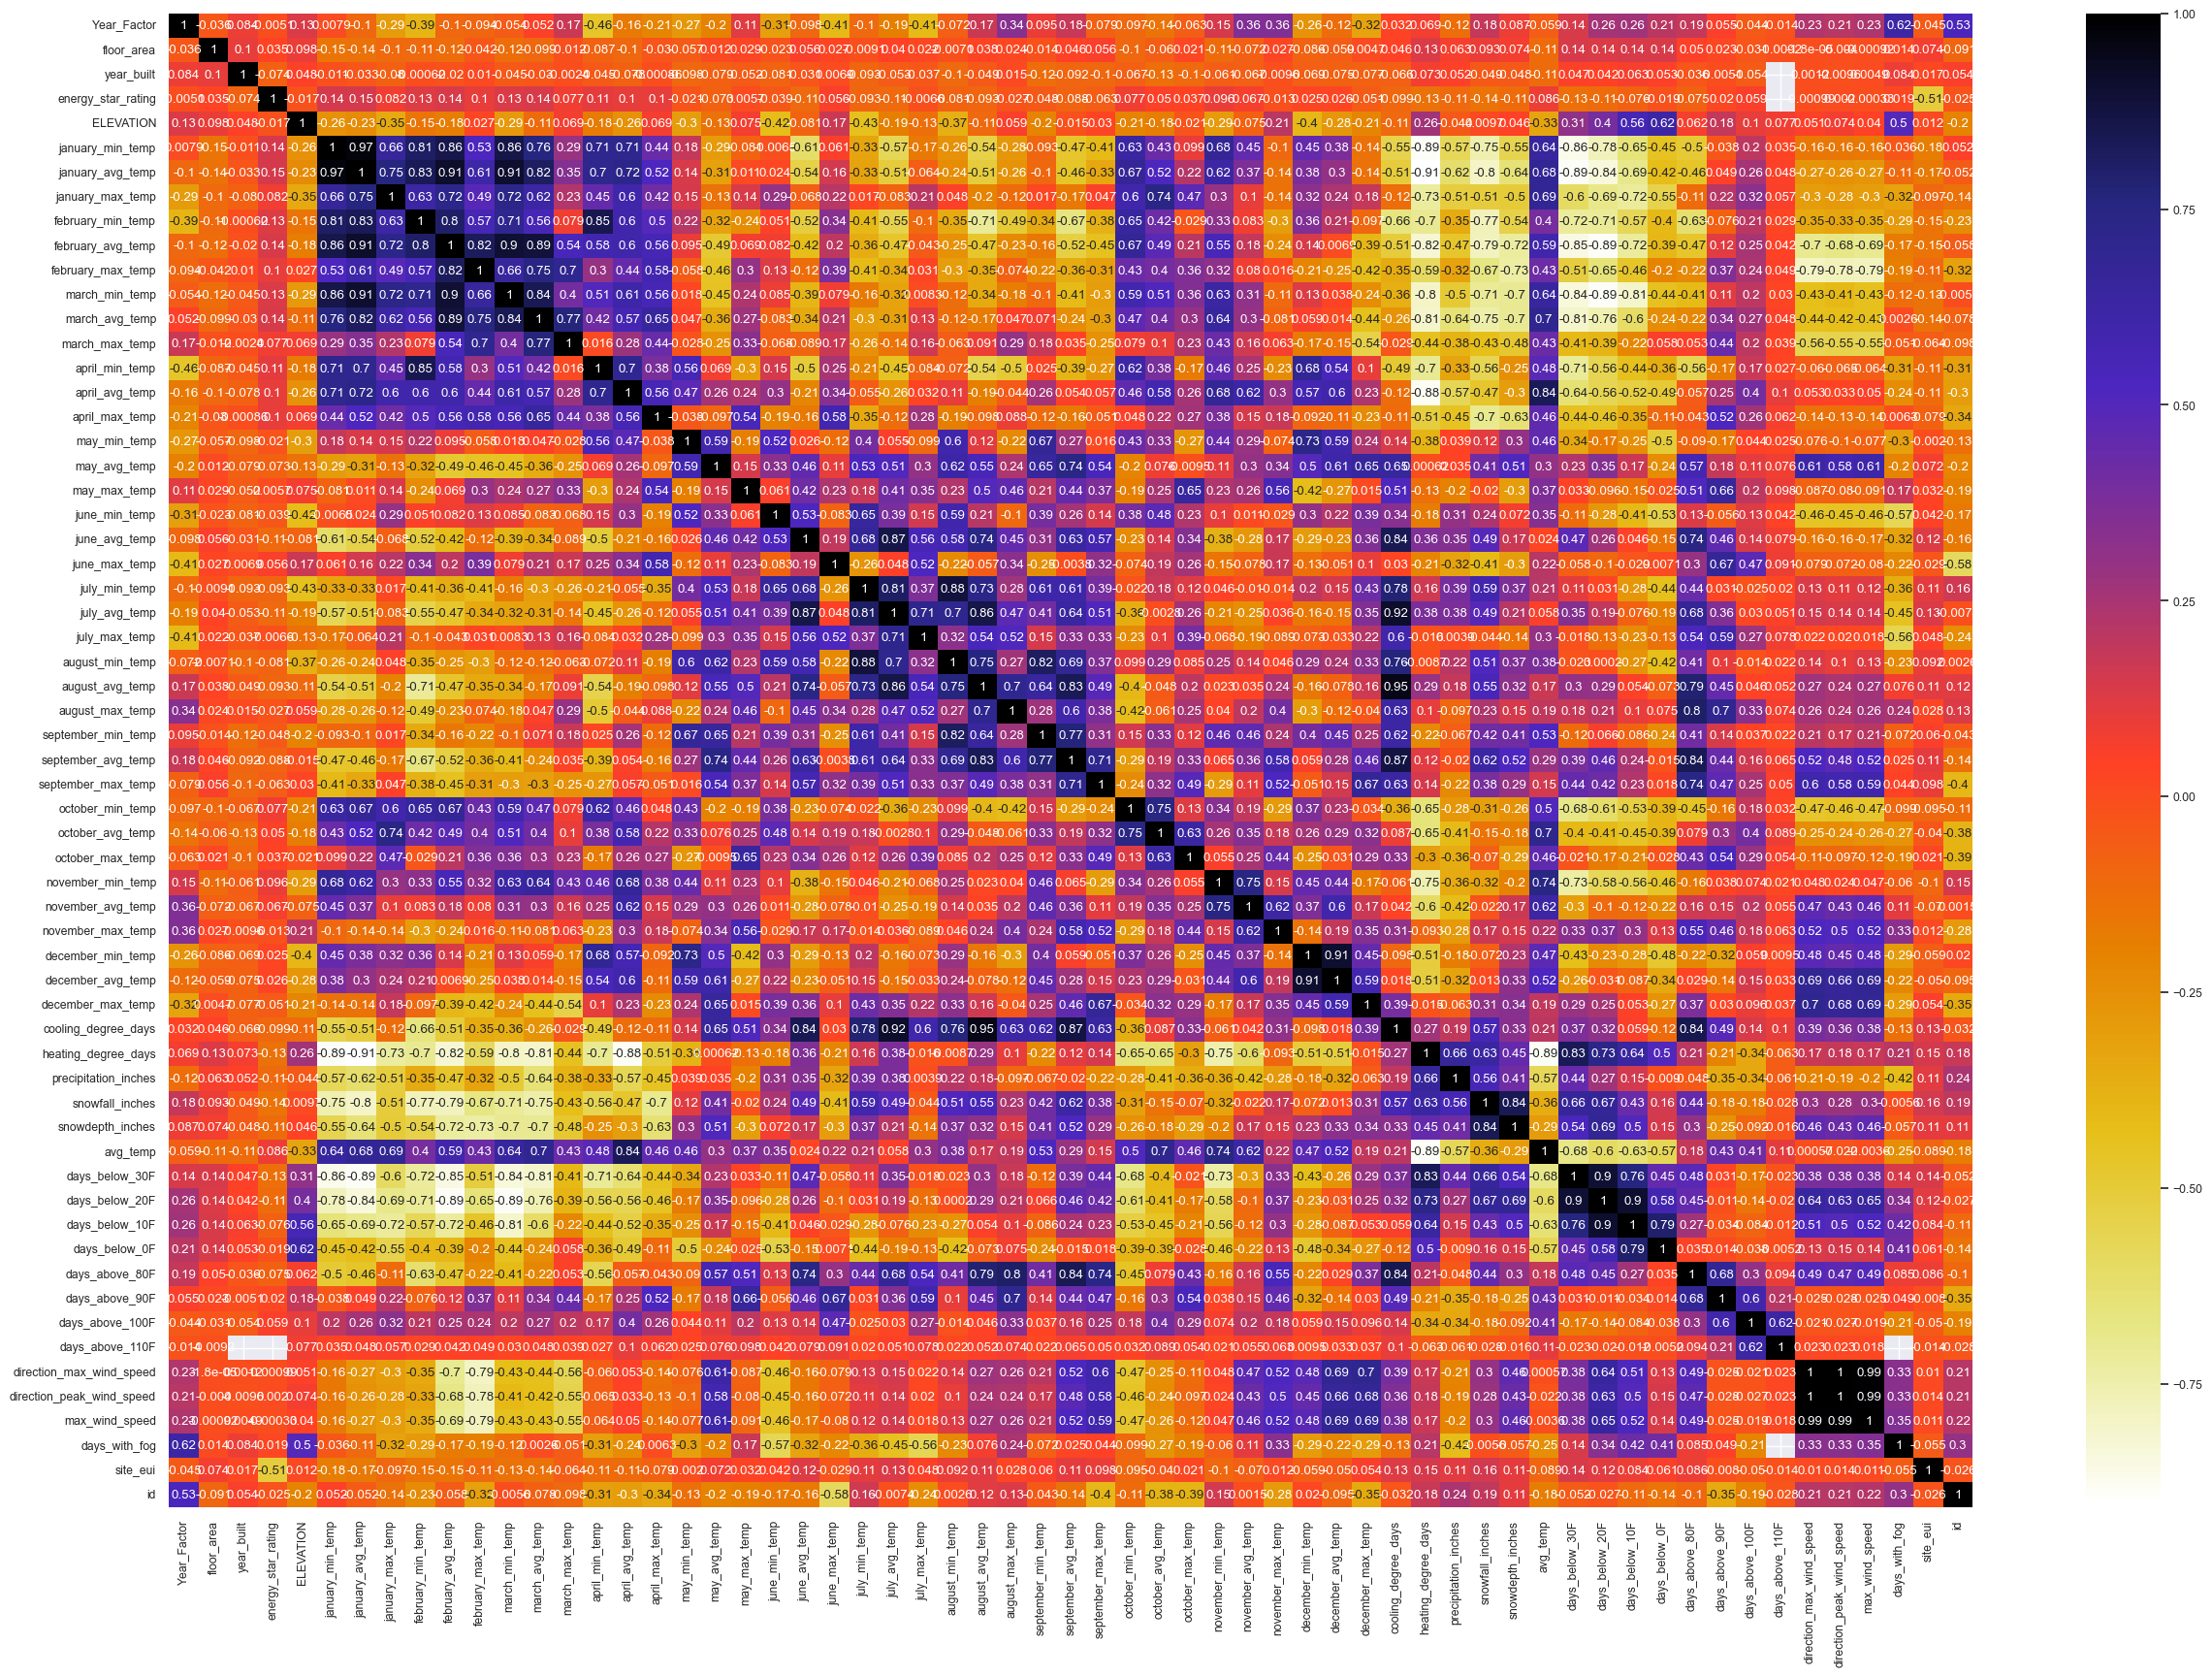

In [114]:
plt.figure(figsize=(30,20))
sns.set(font_scale=0.8)
sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

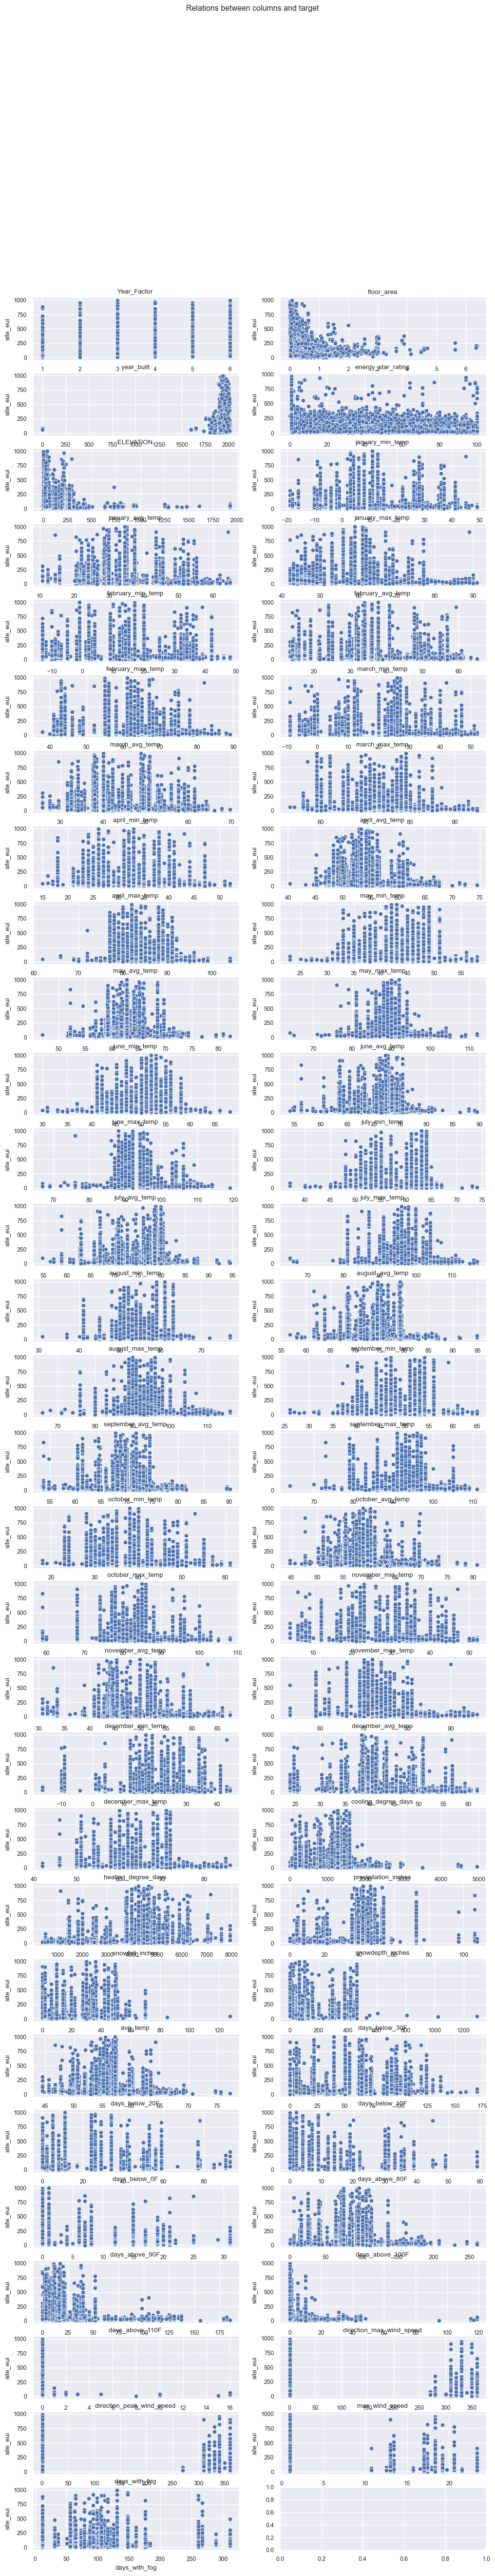

In [115]:
ndf = train_df.drop(['id','site_eui'], axis=1)
target = train_df['site_eui']

col_list = [col for col in ndf.columns if ndf[col].dtype != 'object']

fig, ax = plt.subplots(30,2, figsize=(12,60))
for idx, col in enumerate(col_list):
    sns.scatterplot(x=col, y='site_eui', data=train_df, ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].grid(visible=True)
    ax[idx//2, idx%2].set_title(f'{col} ')
    
plt.suptitle('Relations between columns and target')
plt.show()

In [117]:
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['State_Factor', 'building_class', 'facility_type']


In [151]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
label_train_df = train_df.copy()
label_train_df[object_cols] = ordinal_encoder.fit_transform(train_df[object_cols])
label_train_df['energy_star_rating'] = label_train_df['energy_star_rating'].fillna(label_train_df['energy_star_rating'].mean())
label_train_df['direction_max_wind_speed'] = label_train_df['direction_max_wind_speed'].fillna(1.0)
label_train_df['direction_peak_wind_speed'] = label_train_df['direction_peak_wind_speed'].fillna(1.0)
label_train_df['max_wind_speed'] = label_train_df['max_wind_speed'].fillna(1.0)
label_train_df['days_with_fog'] = label_train_df['days_with_fog'].fillna(label_train_df['days_with_fog'].mean())
label_train_df['Avg_min_temp_winter'] = (label_train_df['january_min_temp'] + label_train_df['february_min_temp'] + label_train_df['march_min_temp'] + label_train_df['april_min_temp'] + label_train_df['october_min_temp'] + label_train_df['november_min_temp'] + label_train_df['december_min_temp'])/7
label_train_df['Avg_max_temp_winter'] = (label_train_df['january_max_temp'] + label_train_df['february_max_temp'] + label_train_df['march_max_temp'] + label_train_df['april_max_temp'] + label_train_df['october_max_temp'] + label_train_df['november_max_temp'] + label_train_df['december_max_temp'])/7
label_train_df['Avg_temp_winter'] = (label_train_df['january_avg_temp'] + label_train_df['february_avg_temp'] + label_train_df['march_avg_temp'] + label_train_df['april_avg_temp'] + label_train_df['october_avg_temp'] + label_train_df['november_avg_temp'] + label_train_df['december_avg_temp'])/7
label_train_df['Avg_min_temp_summer'] = (label_train_df['may_min_temp'] + label_train_df['june_min_temp'] + label_train_df['july_min_temp'] + label_train_df['august_min_temp'] + label_train_df['september_min_temp'])/5 
label_train_df['Avg_max_temp_summer'] = (label_train_df['may_max_temp'] + label_train_df['june_max_temp'] + label_train_df['july_max_temp'] + label_train_df['august_max_temp'] + label_train_df['september_max_temp'])/5
label_train_df['Avg_temp_summer'] = (label_train_df['may_avg_temp'] + label_train_df['june_avg_temp'] + label_train_df['july_avg_temp'] + label_train_df['august_avg_temp'] + label_train_df['september_avg_temp'])/5 
label_train_df['Avg_days_below30F'] = (label_train_df['days_below_30F'] + label_train_df['days_below_20F'] + label_train_df['days_below_10F'] + label_train_df['days_below_0F'])/4
label_train_df = label_train_df.fillna(0)
months_cols = list(label_train_df.iloc[:,5:41].columns) + ['days_below_30F','days_below_20F', 'days_below_10F','days_below_0F','direction_max_wind_speed', 'direction_peak_wind_speed','snowdepth_inches','avg_temp','days_above_90F']
Xtraindf = label_train_df.drop(columns=months_cols, axis=1)
Xtraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           75757 non-null  int64  
 1   State_Factor          75757 non-null  float64
 2   building_class        75757 non-null  float64
 3   facility_type         75757 non-null  float64
 4   floor_area            75757 non-null  float64
 5   december_min_temp     75757 non-null  int64  
 6   december_avg_temp     75757 non-null  float64
 7   december_max_temp     75757 non-null  int64  
 8   cooling_degree_days   75757 non-null  int64  
 9   heating_degree_days   75757 non-null  int64  
 10  precipitation_inches  75757 non-null  float64
 11  snowfall_inches       75757 non-null  float64
 12  days_above_80F        75757 non-null  int64  
 13  days_above_100F       75757 non-null  int64  
 14  days_above_110F       75757 non-null  int64  
 15  max_wind_speed     

In [152]:
label_test_df = test_df.copy()
label_test_df[object_cols] = ordinal_encoder.transform(test_df[object_cols])
label_test_df['energy_star_rating'] = label_test_df['energy_star_rating'].fillna(label_test_df['energy_star_rating'].mean())
label_test_df['direction_max_wind_speed'] = label_test_df['direction_max_wind_speed'].fillna(1.0)
label_test_df['direction_peak_wind_speed'] = label_test_df['direction_peak_wind_speed'].fillna(1.0)
label_test_df['max_wind_speed'] = label_test_df['max_wind_speed'].fillna(1.0)
label_test_df['days_with_fog'] = label_test_df['days_with_fog'].fillna(label_test_df['days_with_fog'].mean())
label_test_df['Avg_min_temp_winter'] = (label_test_df['january_min_temp'] + label_test_df['february_min_temp'] + label_test_df['march_min_temp'] + label_test_df['april_min_temp'] + label_test_df['october_min_temp'] + label_test_df['november_min_temp'] + label_test_df['december_min_temp'])/7
label_test_df['Avg_max_temp_winter'] = (label_test_df['january_max_temp'] + label_test_df['february_max_temp'] + label_test_df['march_max_temp'] + label_test_df['april_max_temp'] + label_test_df['october_max_temp'] + label_test_df['november_max_temp'] + label_test_df['december_max_temp'])/7
label_test_df['Avg_temp_winter'] = (label_test_df['january_avg_temp'] + label_test_df['february_avg_temp'] + label_test_df['march_avg_temp'] + label_test_df['april_avg_temp'] + label_test_df['october_avg_temp'] + label_test_df['november_avg_temp'] + label_test_df['december_avg_temp'])/7
label_test_df['Avg_min_temp_summer'] = (label_test_df['may_min_temp'] + label_test_df['june_min_temp'] + label_test_df['july_min_temp'] + label_test_df['august_min_temp'] + label_test_df['september_min_temp'])/5 
label_test_df['Avg_max_temp_summer'] = (label_test_df['may_max_temp'] + label_test_df['june_max_temp'] + label_test_df['july_max_temp'] + label_test_df['august_max_temp'] + label_test_df['september_max_temp'])/5
label_test_df['Avg_temp_summer'] = (label_test_df['may_avg_temp'] + label_test_df['june_avg_temp'] + label_test_df['july_avg_temp'] + label_test_df['august_avg_temp'] + label_test_df['september_avg_temp'])/5 
label_test_df['Avg_days_below30F'] = (label_test_df['days_below_30F'] + label_test_df['days_below_20F'] + label_test_df['days_below_10F'] + label_test_df['days_below_0F'])/4
label_test_df = label_test_df.fillna(0)
months_cols = list(label_test_df.iloc[:,5:41].columns) + ['days_below_30F','days_below_20F', 'days_below_10F','days_below_0F','direction_max_wind_speed', 'direction_peak_wind_speed','snowdepth_inches','avg_temp','days_above_90F']
Xtestdf = label_test_df.drop(columns=months_cols, axis=1)
Xtestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           9705 non-null   int64  
 1   State_Factor          9705 non-null   float64
 2   building_class        9705 non-null   float64
 3   facility_type         9705 non-null   float64
 4   floor_area            9705 non-null   float64
 5   december_min_temp     9705 non-null   int64  
 6   december_avg_temp     9705 non-null   float64
 7   december_max_temp     9705 non-null   int64  
 8   cooling_degree_days   9705 non-null   int64  
 9   heating_degree_days   9705 non-null   int64  
 10  precipitation_inches  9705 non-null   float64
 11  snowfall_inches       9705 non-null   float64
 12  days_above_80F        9705 non-null   int64  
 13  days_above_100F       9705 non-null   int64  
 14  days_above_110F       9705 non-null   int64  
 15  max_wind_speed       

In [139]:
y = Xtraindf['site_eui'].values
X = Xtraindf.drop(columns=['site_eui', 'id'])
cols = X.columns
X = X.values

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print(score)

0.256769910994617
